In [4]:
import pandas as pd
#import simplejson as json
import branca.colormap as cm
from scipy.stats import boxcox
import geopandas as gpd
import seaborn as sns
import datetime as dt
import numpy as np
#from mpl_toolkits.basemap import Basemap
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from matplotlib.ticker import StrMethodFormatter
from pandas import DataFrame
from shapely.geometry import Point
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
import json
import glob
import re
import os
import io


%matplotlib inline

In [9]:
state_shp = '/Users/leo/Personal/Python/cb_2018_us_state_500k/cb_2018_us_state_500k.shp'


In [10]:
Tn_accident= pd.read_csv('../data/Tn_Accidents.csv')
#Traffic_Accident=pd.read_csv('../data/Traffic_Accidents.csv')
traffic_accident=gpd.read_file('../data/Traffic Accidents.geojson')
zipcodes = gpd.read_file('../data/zipcodes.geojson')
country=gpd.read_file('../data/cb_2018_us_state_500k/cb_2018_us_state_500k.shp')

FileNotFoundError: [Errno 2] No such file or directory: '../data/Tn_Accidents.csv'

In [8]:
country.head(2)

NameError: name 'country' is not defined

In [6]:
traffic_accident

NameError: name 'traffic_accident' is not defined

In [7]:
 #extract unwanted number 
Tn_accident['Zipcode']= Tn_accident  ['Zipcode'].str.extract('(\d\d\d\d\d)',expand=True)

NameError: name 'Tn_accident' is not defined

In [7]:
Tn_accident.isnull().sum()

ID                          0
Severity                    0
Start_Time                  0
End_Time                    0
Start_Lat                   0
Start_Lng                   0
End_Lat                     0
End_Lng                     0
Distance(mi)                0
Description                 0
Number                   9671
Street                      0
Side                        0
City                        0
County                      0
State                       0
Zipcode                     0
Country                     0
Timezone                    0
Airport_Code                2
Weather_Timestamp          90
Temperature(F)            187
Wind_Chill(F)            2965
Humidity(%)               193
Pressure(in)               94
Visibility(mi)             92
Wind_Direction            121
Wind_Speed(mph)           751
Precipitation(in)        2904
Weather_Condition         112
Amenity                     0
Bump                        0
Crossing                    0
Give_Way  

In [8]:
# Exclude unnecessary columns

Tn_accident.drop(['End_Lng','End_Lat','State','Country','Number','Wind_Chill(F)','Precipitation(in)','Weather_Timestamp'], axis=1, inplace=True)

In [9]:
# Summary Statistics
Tn_accident.describe()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
count,17143.000000,17143.000000,17143.000000,17143.000000,16956.000000,16950.000000,17049.000000,17051.000000,16392.000000
mean,2.063991,35.774143,-86.538179,0.583028,60.088966,66.605310,29.536854,9.247402,6.840410
std,0.564827,0.507723,1.457101,1.142939,16.437936,20.423629,0.401853,2.037726,4.817695
min,1.000000,34.983183,-90.096510,0.000000,0.000000,14.000000,27.430000,0.000000,0.000000
25%,2.000000,35.123020,-86.791380,0.016000,48.000000,50.000000,29.330000,10.000000,3.000000
50%,2.000000,36.070250,-86.721020,0.145000,61.000000,70.000000,29.490000,10.000000,6.000000
75%,2.000000,36.156591,-85.293609,0.587000,73.000000,84.000000,29.700000,10.000000,9.200000
max,4.000000,36.628190,-82.103028,21.189000,98.100000,100.000000,57.740000,10.000000,34.500000


In [10]:
Tn_accident.Severity.value_counts()

2    13947
1     1440
3      975
4      781
Name: Severity, dtype: int64

In [11]:
#rename zip by zipcode
traffic_accident.rename(columns={'zip':'Zipcode'}, inplace=True)

# Data manipulation: extract year, month, day, hour and time to clear accidents

In [12]:
# change the data type to datetime.
Tn_accident.Start_Time.replace({'/0/' : '/1/'}, regex = True, inplace = True)


In [13]:
# change the data type to datetime.
Tn_accident['Start_Time']

0         11/30/16 5:07 PM
1         11/30/16 5:07 PM
2         11/30/16 5:41 PM
3         11/30/16 5:41 PM
4         11/30/16 6:05 PM
               ...        
17138     12/10/19 2:48 PM
17139     12/10/19 4:05 PM
17140     12/10/19 4:56 PM
17141    12/10/19 10:51 PM
17142    12/10/19 10:51 PM
Name: Start_Time, Length: 17143, dtype: object

In [14]:
Tn_accident['Start_Time']=pd.to_datetime(Tn_accident['Start_Time'],format='%m/%d/%y %H:%M %p')

In [15]:

Tn_accident.End_Time.replace({'/0/' : '/1/'}, regex = True, inplace = True)

In [16]:
Tn_accident['End_Time']=pd.to_datetime(Tn_accident['End_Time'],format='%m/%d/%y %H:%M %p')


In [17]:

Tn_accident['Start_Date'] = Tn_accident['Start_Time'].dt.date
Tn_accident['End_Date'] =Tn_accident['End_Time'].dt.date
Tn_accident['Time_Diff'] = (Tn_accident.End_Time - Tn_accident.Start_Time)
Tn_accident['Year'] = Tn_accident['Start_Time'].dt.year
Tn_accident['Month'] =Tn_accident['Start_Time'].dt.month
Tn_accident['Day'] =Tn_accident['Start_Time'].dt.day
Tn_accident['Hour'] = Tn_accident['Start_Time'].dt.hour
Tn_accident['Min'] = Tn_accident['Start_Time'].dt.minute

In [18]:
#slice only from 2016-2021
Tn_accident1=Tn_accident[Tn_accident['Year'].between(2016,2021)]
Tn_accident1

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,...,Nautical_Twilight,Astronomical_Twilight,Start_Date,End_Date,Time_Diff,Year,Month,Day,Hour,Min
0,A-2749210,2,2016-11-30 05:07:00,2016-11-30 11:07:00,35.152571,-89.886753,0.383,At I-40/Exit 12 - Accident.,I-240 W,R,...,Day,Day,2016-11-30,2016-11-30,0 days 06:00:00,2016,11,30,5,7
1,A-2749215,2,2016-11-30 05:07:00,2016-11-30 11:07:00,35.153122,-89.887304,0.237,At I-240/Sam Cooper/Exit 10/Exit 12 - Accident.,I-40 E,R,...,Day,Day,2016-11-30,2016-11-30,0 days 06:00:00,2016,11,30,5,7
2,A-2749231,2,2016-11-30 05:41:00,2016-11-30 11:41:00,36.153730,-86.763210,0.131,At I-65/Exit 211 - Accident.,I-40 E,R,...,Night,Day,2016-11-30,2016-11-30,0 days 06:00:00,2016,11,30,5,41
3,A-2749232,2,2016-11-30 05:41:00,2016-11-30 11:41:00,36.154430,-86.761020,0.147,At I-65/Exit 211 - Accident.,I-40 E,R,...,Night,Day,2016-11-30,2016-11-30,0 days 06:00:00,2016,11,30,5,41
4,A-2749247,2,2016-11-30 06:05:00,2016-12-01 12:05:00,36.151520,-86.751530,0.053,At Fairfield Ave/Exit 212 - Accident.,I-24 W,R,...,Night,Night,2016-11-30,2016-12-01,1 days 06:00:00,2016,11,30,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17138,A-3770942,2,2019-12-10 02:48:00,2019-12-10 03:16:00,36.154090,-86.838000,0.579,At 46th Ave/Exit 205 - Accident.,I-40 W,R,...,Day,Day,2019-12-10,2019-12-10,0 days 00:28:00,2019,12,10,2,48
17139,A-3770944,2,2019-12-10 04:05:00,2019-12-10 04:35:00,36.149460,-86.783820,0.196,At I-65/Exit 210 - Accident. Lane blocked.,I-65 S,R,...,Day,Day,2019-12-10,2019-12-10,0 days 00:30:00,2019,12,10,4,5
17140,A-3770948,2,2019-12-10 04:56:00,2019-12-10 05:26:00,36.075210,-86.693230,0.479,At TN-255/Harding Pl/Exit 56 - Accident.,I-24 W,R,...,Day,Day,2019-12-10,2019-12-10,0 days 00:30:00,2019,12,10,4,56
17141,A-3770953,3,2019-12-10 10:51:00,2019-12-10 11:20:00,35.823320,-86.886490,0.158,At Tollgate Blvd - Multi-vehicle accident invo...,Columbia Pike,L,...,Night,Night,2019-12-10,2019-12-10,0 days 00:29:00,2019,12,10,10,51


In [1]:
hour_min=Tn_accident1[['Hour','Min']].head(10)
hour_min.sort_values(['Hour','Min'],ascending=False,inplace=True)


NameError: name 'Tn_accident1' is not defined

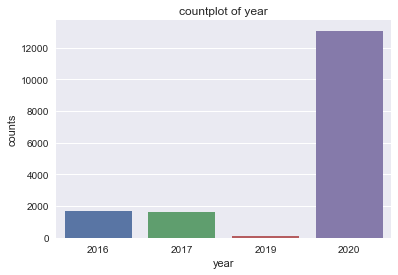

In [20]:
year_count=Tn_accident1['Year'].value_counts().reset_index().rename(columns={'index':'year','Year':'counts'})
x=year_count.year
y=year_count.counts
sns.barplot(x,y,data = year_count)
plt.title('countplot of year')



plt.show()

In [21]:
City_counts=Tn_accident1['City'].value_counts(normalize=True)*100

City_counts1=City_counts.reset_index().rename(columns={'index':'City','City':'counts'}).head(20)
#City_counts1.plot(kind='barh')
#plt.gca().invert_yaxis()
City_counts1


,City,counts
0,Nashville,40.057164
1,Chattanooga,16.826806
2,Memphis,9.219168
3,Antioch,4.688640
4,Knoxville,3.198735
5,Madison,2.876429
6,Hixson,1.818292
7,Brentwood,1.538555
8,Ooltewah,1.362199
9,Hermitage,1.343955


In [22]:
#We can use groupby to organize the data by City and counts
City_counts1=City_counts1.groupby(['City','counts']).sum()
City_counts2=City_counts1.sort_values('counts',ascending=False,).reset_index()
City_counts2

,City,counts
0,Nashville,40.057164
1,Chattanooga,16.826806
2,Memphis,9.219168
3,Antioch,4.688640
4,Knoxville,3.198735
5,Madison,2.876429
6,Hixson,1.818292
7,Brentwood,1.538555
8,Ooltewah,1.362199
9,Hermitage,1.343955


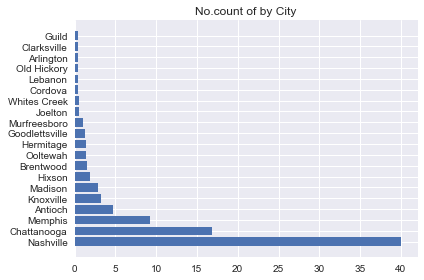

In [23]:
#make a plot using variable 

x=City_counts2.City
y=City_counts2.counts

plt.barh(x,y)
plt.title('No.count of by City' )
plt.tight_layout()
plt.show()

#City_counts1.plot(kind='barh')

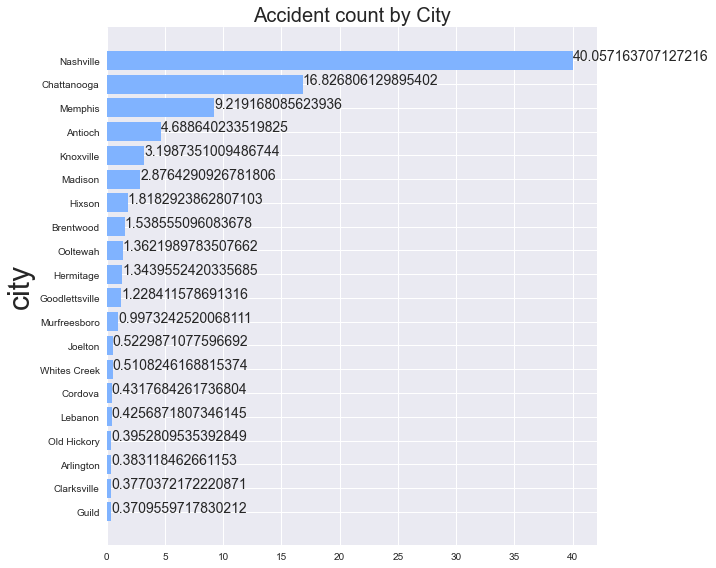

In [24]:

x=City_counts2.City
y=City_counts2.counts

plt.rcParams['figure.figsize'] = [10, 8]
plt.barh(x,y, color='#80B3FF')
for index, value in enumerate(y):
    plt.text(value, index, str(value),size=14)
plt.ylabel('city', size = 30)
plt.title('Accident count by City', size=20 )
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

In [25]:
#group the city and apply agg function on cunts column
city_group=City_counts2.groupby(['City']).agg({'counts':['sum','max','mean']}).reset_index()
city_group

City     counts                      
                          sum        max       mean
0          Antioch   4.688640   4.688640   4.688640
1        Arlington   0.383118   0.383118   0.383118
2        Brentwood   1.538555   1.538555   1.538555
3      Chattanooga  16.826806  16.826806  16.826806
4      Clarksville   0.377037   0.377037   0.377037
5          Cordova   0.431768   0.431768   0.431768
6   Goodlettsville   1.228412   1.228412   1.228412
7            Guild   0.370956   0.370956   0.370956
8        Hermitage   1.343955   1.343955   1.343955
9           Hixson   1.818292   1.818292   1.818292
10         Joelton   0.522987   0.522987   0.522987
11       Knoxville   3.198735   3.198735   3.198735
12         Lebanon   0.425687   0.425687   0.425687
13         Madison   2.876429   2.876429   2.876429
14         Memphis   9.219168   9.219168   9.219168
15    Murfreesboro   0.997324   0.997324   0.997324
16       Nashville  40.057164  40.057164  40.057164
17     Old Hickory   0.395281   0.395281   0.395281
18        Ooltewah   1.362199   1.362199   1.362199
19    Whites Creek   0.510825   0.510825   0.510825

<AxesSubplot:title={'center':'Accidents'}, xlabel='year', ylabel='counts'>

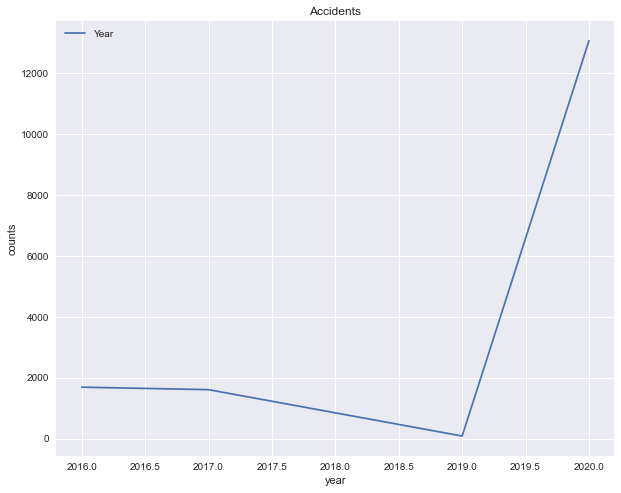

In [26]:
#Number of Accidents

Accident_year=DataFrame(Tn_accident1.groupby('Year')['Year'].agg('count')).rename(columns={'year':'count'})
Accident_year.plot( rot=0, title='Accidents', xlabel='year', ylabel='counts' )

In [27]:
#First group the data by year and Severity and use size() to count the records in each group, then use unstack() to pivot the result.
Tn_accident1.groupby(["Year","Severity"]).size().unstack().fillna(0)


Severity,1,2,3,4
Year,,,,
2016,0.0,1165.0,286.0,237.0
2017,0.0,1100.0,276.0,230.0
2019,0.0,57.0,10.0,16.0
2020,1440.0,10932.0,403.0,292.0


In [28]:
#First group the data by year and Severity and use size() to count the records in each group, 
#then use unstack() to pivot the result

year_grp = Tn_accident1.groupby(["Year"]).agg(Count = ('ID','count'))
year_sev =Tn_accident1.groupby(["Year","Severity"]).size().unstack()


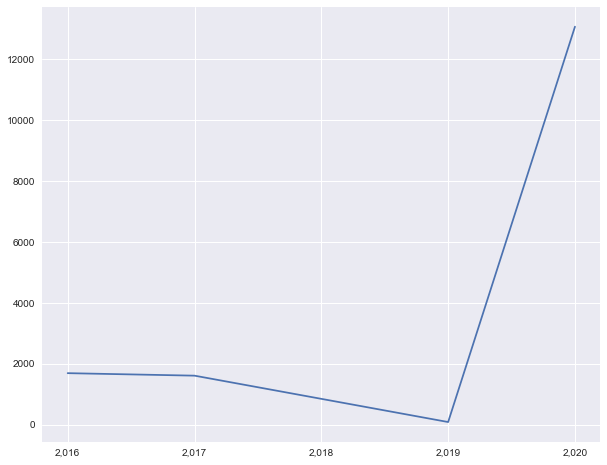

In [29]:
# notice that severity year is index in the dataframe 
plt.plot(year_grp.index,year_grp["Count"])
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.xticks(np.arange(2016, 2021, 1.0));

# Severity

The purpose of this analysis is to analyze the data and find out what are the key variables that impact the severity of the traffic accidents that happened in Tennessee and ultimately predict the severity of the accidents based on given variables through data visulization

<function matplotlib.pyplot.show(close=None, block=None)>

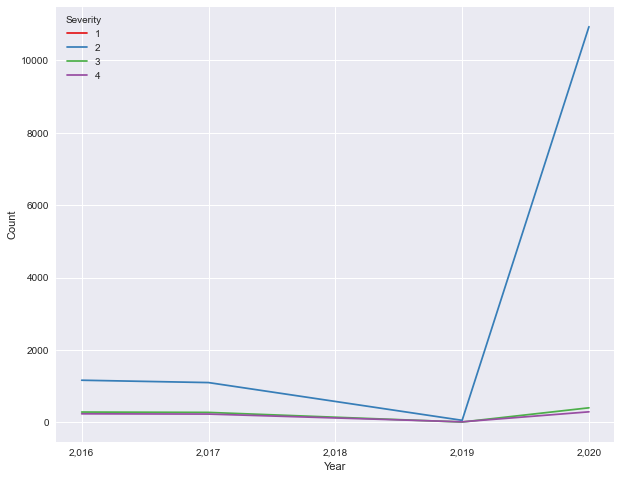

In [30]:
group_year_sev2 = Tn_accident1.groupby(["Year","Severity"]).agg(Count = ('ID','count')).reset_index()
sns.lineplot(x='Year',y='Count',hue="Severity",data=group_year_sev2,palette="Set1")
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.xticks(np.arange(2016, 2021, 1.0));
plt.show

<AxesSubplot:xlabel='Year'>

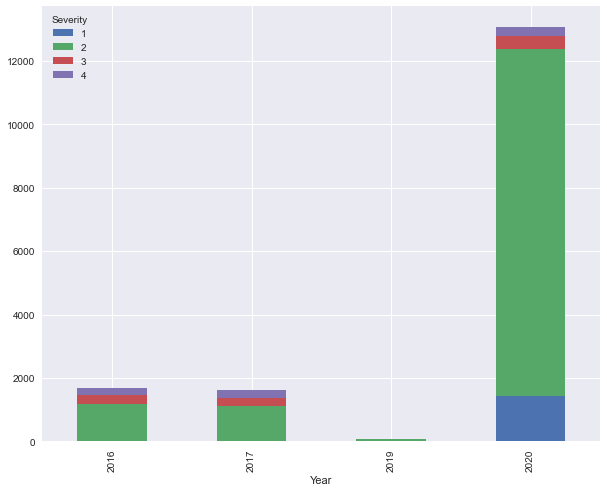

In [31]:
Tn_accident1.groupby(["Year","Severity"]).size().unstack().plot(kind='bar', stacked=True)

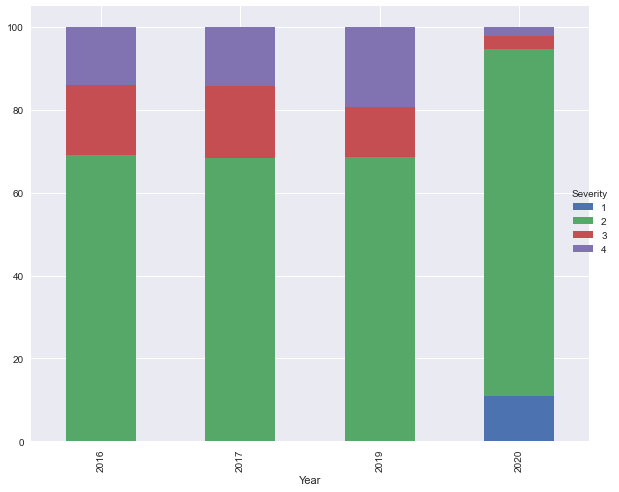

In [32]:
# Makes more sense to show stacked 100%, a different view
Tn_accident1.groupby(["Year","Severity"]).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis
#plt.legend(loc = 'upper left',title = 'Severity')
plt.legend([1,2,3,4], title='Severity',
           bbox_to_anchor = (1.05, 0.6))
plt.show()

The dataset also contains some variables regarding the weather condition when the accidents happened. We also want to examine those variables to see if any of the weather related variables have impact on the severity of the accidents.

We want to use boxplot from seaborn library to see how the weather related variable changed in different type of accidents.

Below is a boxplot of Temperature and Severity, we can see that there are difference in median temparature in all severity while lower medium temperature in severity 2, which might indicate that lower temperature might result to severe accidents.

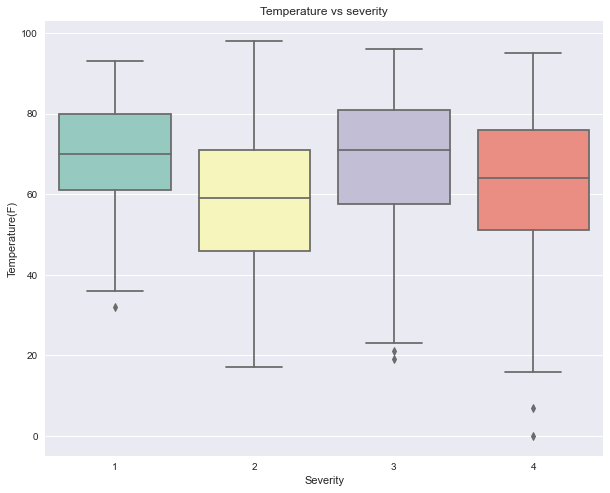

In [33]:
sns.boxplot(x="Severity", y="Temperature(F)", data=Tn_accident1, palette="Set3");
plt.title('Temperature vs severity');

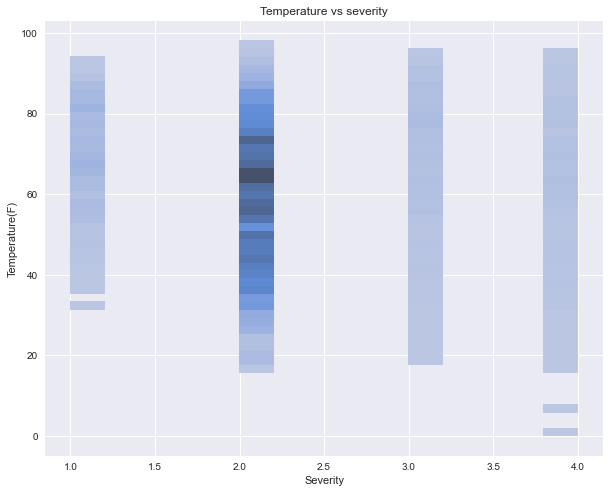

In [34]:
sns.histplot(x="Severity", y="Temperature(F)", data=Tn_accident1, palette="Set3");
plt.title('Temperature vs severity');

Below is a boxplot of Humidity and Severity, similiarly, we can see that higher humidity might lead to more severe accidents.

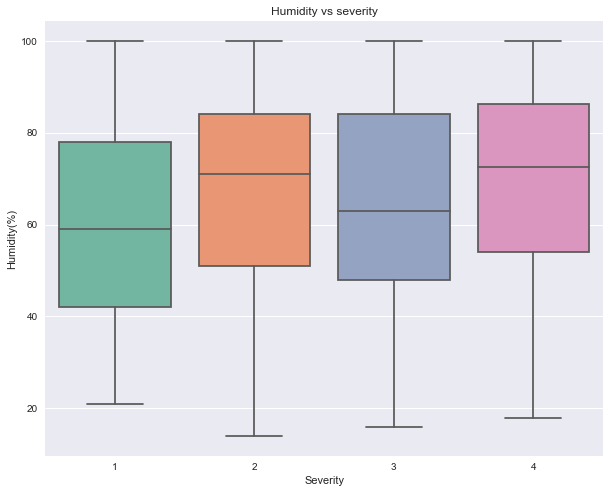

In [35]:
sns.boxplot(x="Severity", y="Humidity(%)", data=Tn_accident1, palette="Set2");
plt.title('Humidity vs severity');

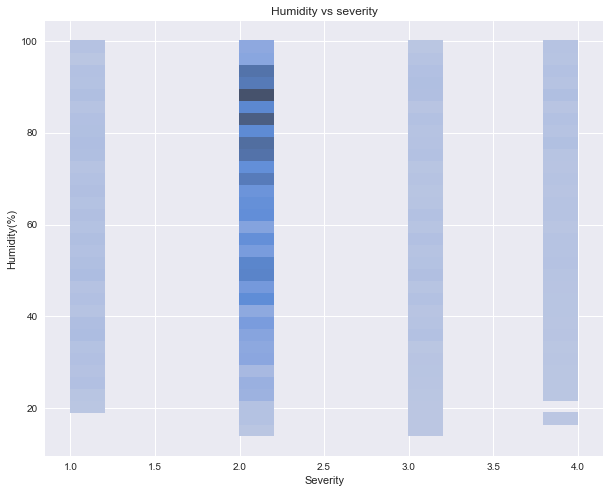

In [36]:
sns.histplot(x="Severity", y="Humidity(%)", data=Tn_accident1, palette="Set3");
plt.title('Humidity vs severity');


In [37]:
#Count of Severity by day and night

pd.crosstab(Tn_accident1["Severity"], Tn_accident1["Sunrise_Sunset"], 
            rownames=['Severity'], colnames=['Sunrise_Sunset'])

Sunrise_Sunset,Day,Night
Severity,,
1,1358,82
2,6577,6677
3,768,207
4,440,335


The barplot below indicates that more severe accidents are happening during the day then in the night time.

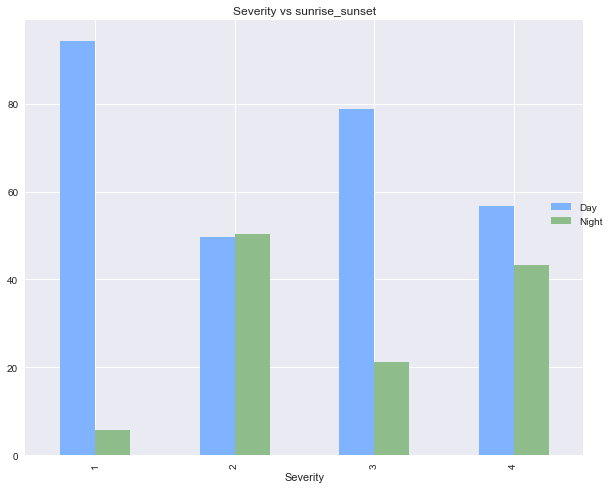

In [38]:
Tn_accident1.groupby(["Severity","Sunrise_Sunset"]).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',color=['#80B3FF', '#8FBC8B'], stacked=False)
plt.title('Severity vs sunrise_sunset')
plt.gca().yaxis
plt.legend(loc = 'upper right',title = 'Sunrise/Sunset')
plt.legend(["Day","Night"],
           bbox_to_anchor = (1.05, 0.6))
plt.show()

#Following plot shows for each variable break down by accident severity, the count of True and False.

From the plot, Corssing, Junction, Tracffic Signal have some impact.

In [39]:
#To plot the variables in the same grid, we used melt() and then groupby() to reshape the dataset.

accident_melt = pd.melt(Tn_accident1,id_vars =['Severity'],value_vars=['Amenity', 'Bump','Crossing','Give_Way',
                         'Junction','No_Exit','Railway','Roundabout','Station',
                         'Stop','Traffic_Calming','Traffic_Signal','Turning_Loop'])
road_gdp = accident_melt.groupby(["Severity","variable","value"]).agg(Count = ('value','count')).reset_index()
road_gdp.head()

,Severity,variable,value,Count
0,1,Amenity,False,1399
1,1,Amenity,True,41
2,1,Bump,False,1440
3,1,Crossing,False,1146
4,1,Crossing,True,294


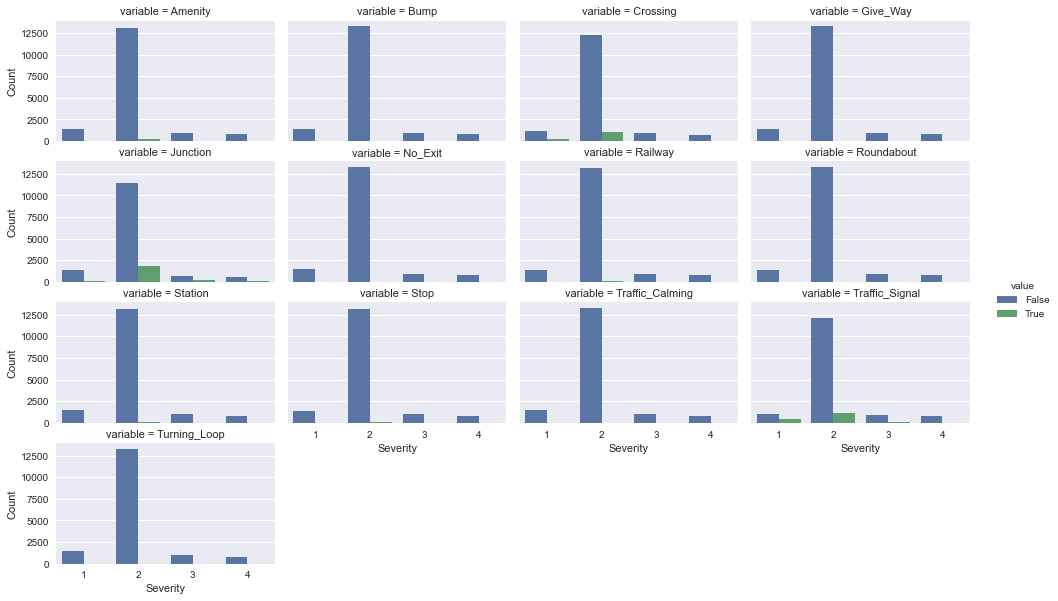

In [40]:

M =sns.catplot(x="Severity", y="Count",
            hue="value", col="variable",
            col_wrap=4, data=road_gdp, kind="bar", height=4, aspect=.7)

M.fig.set_figwidth(15)
M.fig.set_figheight(8)
               

                   

               

In [41]:
severity4=Tn_accident1[Tn_accident1['Severity']==4]
severity4.columns


Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Description', 'Street', 'Side', 'City', 'County',
       'Zipcode', 'Timezone', 'Airport_Code', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight',
       'Start_Date', 'End_Date', 'Time_Diff', 'Year', 'Month', 'Day', 'Hour',
       'Min'],
      dtype='object')

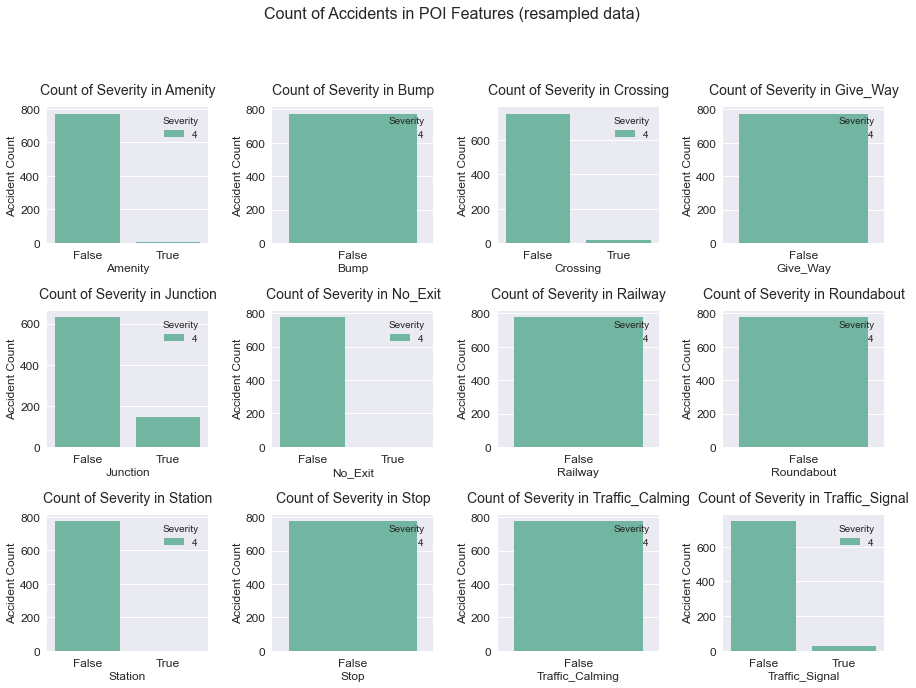

In [42]:
POI_features = ['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal']

fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(15, 10))

plt.subplots_adjust(hspace=0.5,wspace = 0.4)
for i, feature in enumerate(POI_features, 1):    
    plt.subplot(3, 4, i)
    sns.countplot(x=feature, hue='Severity', data=severity4,palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Accident Count', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    
    plt.title('Count of Severity in {}'.format(feature), size=14, y=1.05)
fig.suptitle('Count of Accidents in POI Features (resampled data)',y=1.02, fontsize=16)
plt.show()

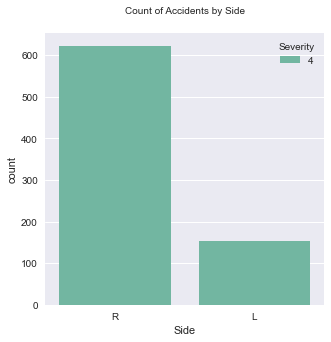

In [43]:
#Side
#Right side of the line is much more dangerous than left side.

plt.figure(figsize=(5,5))
chart = sns.countplot(x='Side',  hue='Severity', data=severity4 ,palette="Set2")
plt.title("Count of Accidents by Side", size=10, y=1.05)
plt.show()

In [44]:
Tn_accident.columns


Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Description', 'Street', 'Side', 'City', 'County',
       'Zipcode', 'Timezone', 'Airport_Code', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight',
       'Start_Date', 'End_Date', 'Time_Diff', 'Year', 'Month', 'Day', 'Hour',
       'Min'],
      dtype='object')

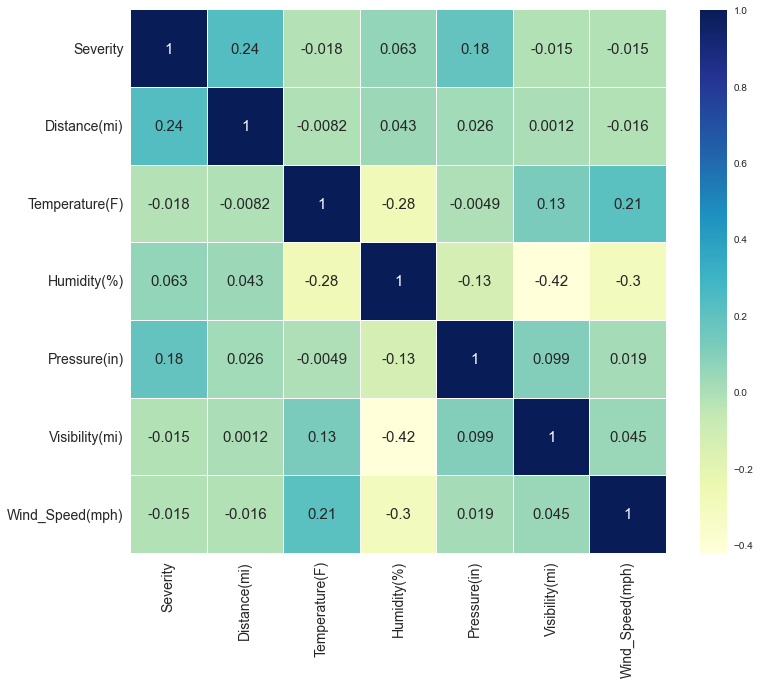

In [45]:
#Finding the correlations in the data

fig=sns.heatmap(Tn_accident1[['Severity',
       'Distance(mi)', 'Description', 'Street', 'Side', 'City', 'County',
       'Zipcode', 'Timezone', 'Airport_Code', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       ]].corr(),annot=True,cmap="YlGnBu",linewidths=0.2 ,annot_kws={'size':15})
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

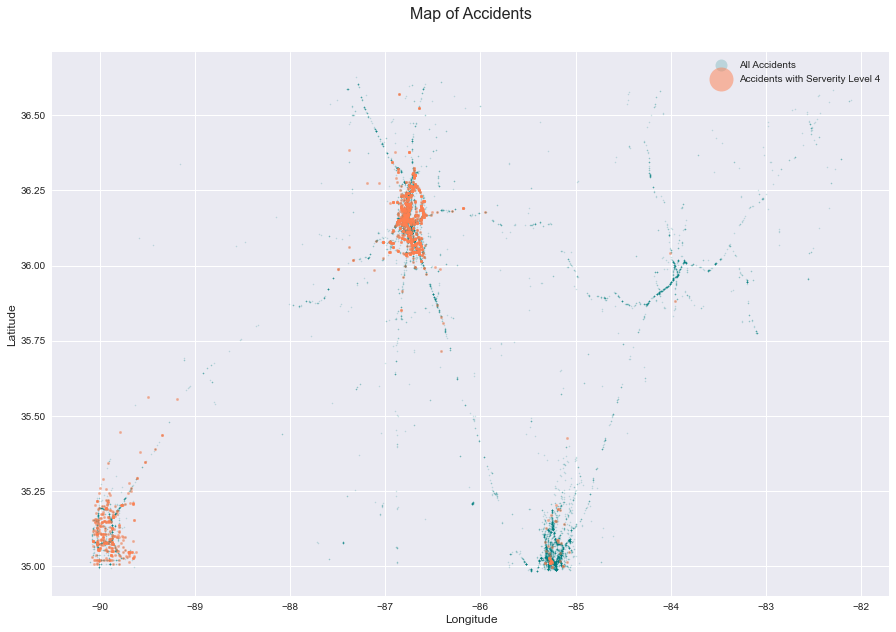

In [46]:
df_4 = Tn_accident1[Tn_accident1['Severity']==1]

plt.figure(figsize=(15,10))

plt.plot( 'Start_Lng', 'Start_Lat', data=Tn_accident1, linestyle='', marker='o', markersize=1.5, color="teal", alpha=0.2, label='All Accidents')
plt.plot( 'Start_Lng', 'Start_Lat', data=df_4, linestyle='', marker='o', markersize=3, color="coral", alpha=0.5, label='Accidents with Serverity Level 4')
plt.legend(markerscale=8)
plt.xlabel('Longitude', size=12, labelpad=3)
plt.ylabel('Latitude', size=12, labelpad=3)
plt.title('Map of Accidents', size=16, y=1.05)
plt.show()

In [47]:
Tn_accident.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Description', 'Street', 'Side', 'City', 'County',
       'Zipcode', 'Timezone', 'Airport_Code', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight',
       'Start_Date', 'End_Date', 'Time_Diff', 'Year', 'Month', 'Day', 'Hour',
       'Min'],
      dtype='object')

we want to know for each month, which day of the month are more likely to have more accidents.
From the heatmap below, we can see that more accidents are happening 

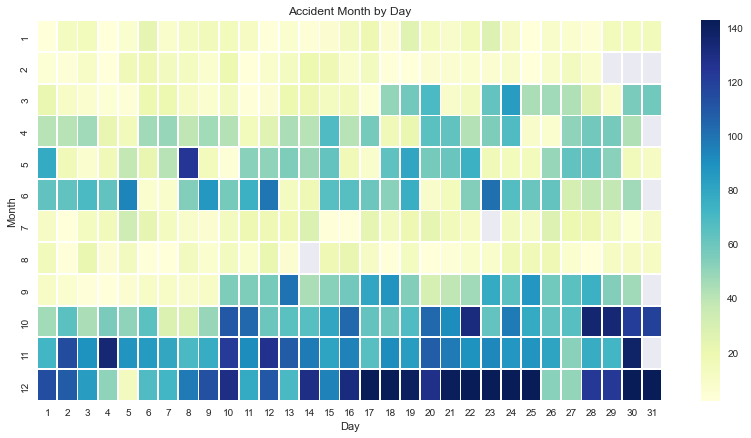

In [48]:
plt.figure(figsize=(14,7))
plt.title('Accident Month by Day')
month_day = Tn_accident1.groupby(['Month','Day']).size().unstack()
ax = sns.heatmap(month_day, cmap='YlGnBu',linewidths=0.8, robust=True)

Similiarly, we want to see in what time of the day, more accidents will happen using a heatmap.

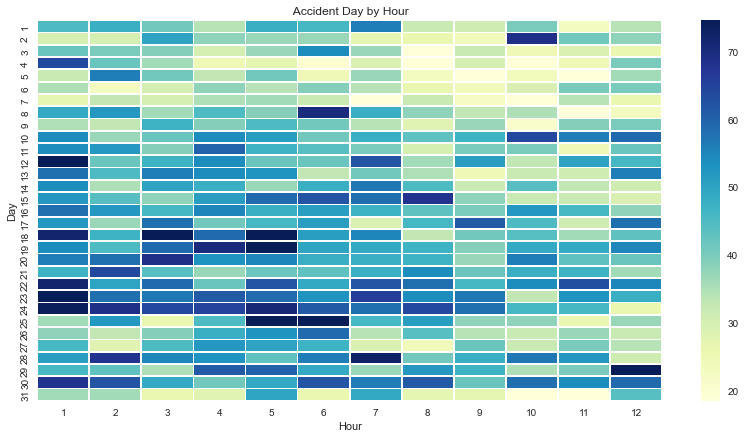

In [49]:
plt.figure(figsize=(14,7))
plt.title(' Accident Day by Hour')
month_day = Tn_accident1.groupby(['Day','Hour']).size().unstack()
ax = sns.heatmap(month_day, cmap='YlGnBu',linewidths=0.8, robust=True)

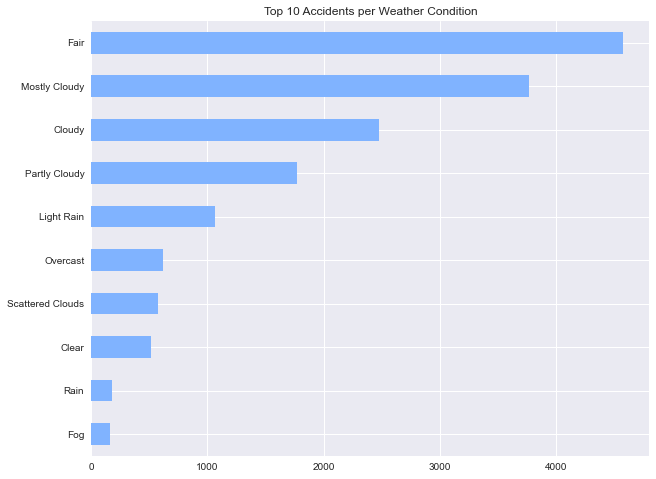

In [50]:
weather=Tn_accident1["Weather_Condition"].value_counts().head(10)
weather.plot(kind='barh', color='#80B3FF')
plt.gca().invert_yaxis()
plt.title('Top 10 Accidents per Weather Condition');


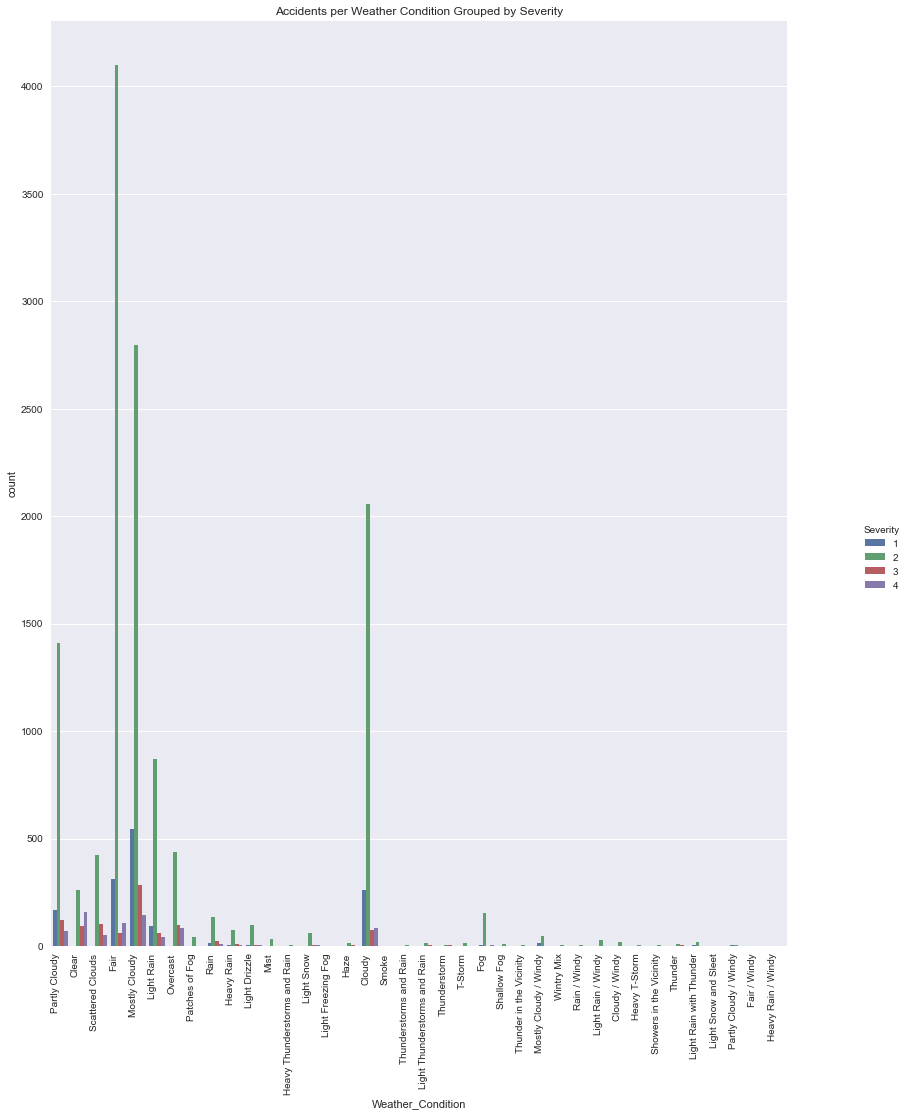

In [51]:
g = sns.catplot(x="Weather_Condition", hue="Severity",
                data=Tn_accident1, kind="count")
g.fig.set_size_inches(14,15)
fig=plt.gcf()

plt.title('Accidents per Weather Condition Grouped by Severity')
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light'
);

In [52]:
#Rename the columns
Tn_accident1.rename(columns={'Start_Lat':'lat','Start_Lng':'lng'}, inplace=True)
Tn_accident1.head(3)

,ID,Severity,Start_Time,End_Time,lat,lng,Distance(mi),Description,Street,Side,...,Nautical_Twilight,Astronomical_Twilight,Start_Date,End_Date,Time_Diff,Year,Month,Day,Hour,Min
0,A-2749210,2,2016-11-30 05:07:00,2016-11-30 11:07:00,35.152571,-89.886753,0.383,At I-40/Exit 12 - Accident.,I-240 W,R,...,Day,Day,2016-11-30,2016-11-30,0 days 06:00:00,2016,11,30,5,7
1,A-2749215,2,2016-11-30 05:07:00,2016-11-30 11:07:00,35.153122,-89.887304,0.237,At I-240/Sam Cooper/Exit 10/Exit 12 - Accident.,I-40 E,R,...,Day,Day,2016-11-30,2016-11-30,0 days 06:00:00,2016,11,30,5,7
2,A-2749231,2,2016-11-30 05:41:00,2016-11-30 11:41:00,36.153730,-86.763210,0.131,At I-65/Exit 211 - Accident.,I-40 E,R,...,Night,Day,2016-11-30,2016-11-30,0 days 06:00:00,2016,11,30,5,41


In [53]:
country

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ..."
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ..."
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ..."
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3..."
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ..."


In [54]:
#plt.scatter(Tn_accident1['lng'], Tn_accident1['lat'], c='darkgreen', marker='p')



In [55]:
#create a geometry column that is a Point datatype
Tn_accident1['geometry'] =Tn_accident1.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))),
                                        axis=1)

                             
Tn_accident1.head(3)            

,ID,Severity,Start_Time,End_Time,lat,lng,Distance(mi),Description,Street,Side,...,Astronomical_Twilight,Start_Date,End_Date,Time_Diff,Year,Month,Day,Hour,Min,geometry
0,A-2749210,2,2016-11-30 05:07:00,2016-11-30 11:07:00,35.152571,-89.886753,0.383,At I-40/Exit 12 - Accident.,I-240 W,R,...,Day,2016-11-30,2016-11-30,0 days 06:00:00,2016,11,30,5,7,POINT (-89.886753 35.152571)
1,A-2749215,2,2016-11-30 05:07:00,2016-11-30 11:07:00,35.153122,-89.887304,0.237,At I-240/Sam Cooper/Exit 10/Exit 12 - Accident.,I-40 E,R,...,Day,2016-11-30,2016-11-30,0 days 06:00:00,2016,11,30,5,7,POINT (-89.887304 35.153122)
2,A-2749231,2,2016-11-30 05:41:00,2016-11-30 11:41:00,36.153730,-86.763210,0.131,At I-65/Exit 211 - Accident.,I-40 E,R,...,Day,2016-11-30,2016-11-30,0 days 06:00:00,2016,11,30,5,41,POINT (-86.76321 36.15373)


In [56]:
Tn_accident_zip = gpd.GeoDataFrame(Tn_accident1, 
                           crs = zipcodes.crs, 
                           geometry =Tn_accident1['geometry'])

In [57]:
Tn_accident_zip.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'lat', 'lng',
       'Distance(mi)', 'Description', 'Street', 'Side', 'City', 'County',
       'Zipcode', 'Timezone', 'Airport_Code', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight',
       'Start_Date', 'End_Date', 'Time_Diff', 'Year', 'Month', 'Day', 'Hour',
       'Min', 'geometry'],
      dtype='object')

In [58]:
type(Tn_accident_zip)

geopandas.geodataframe.GeoDataFrame

In [59]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]
zipcodes.head()
    

,zip,po_name,geometry
0,37115,MADISON,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,NASHVILLE,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,NASHVILLE,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,BRENTWOOD,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,FRANKLIN,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [60]:
accident_by_zip = gpd.sjoin(Tn_accident_zip,zipcodes, op = 'within')

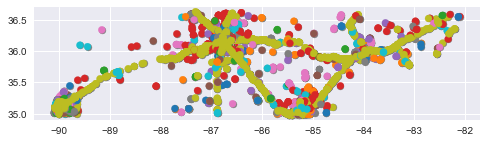

In [61]:
#fig, ax = matplotlib.subplots()
ax = Tn_accident_zip.plot(figsize = (8, 10), color = 'gray')
Tn_accident_zip.plot( ax = ax, column = 'Street');
plt.show();

In [62]:
Tn_accident_zip.geometry.centroid

0        POINT (-89.88675 35.15257)
1        POINT (-89.88730 35.15312)
2        POINT (-86.76321 36.15373)
3        POINT (-86.76102 36.15443)
4        POINT (-86.75153 36.15152)
                    ...            
17138    POINT (-86.83800 36.15409)
17139    POINT (-86.78382 36.14946)
17140    POINT (-86.69323 36.07521)
17141    POINT (-86.88649 35.82332)
17142    POINT (-86.88505 35.82529)
Length: 16444, dtype: geometry

In [63]:
country.head(2)

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."


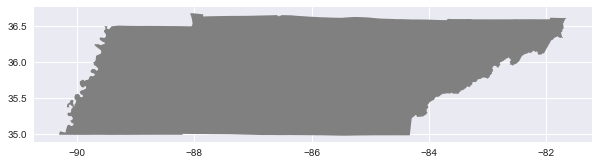

In [64]:
TN=country[country["NAME"] == "Tennessee"].plot(color="gray")

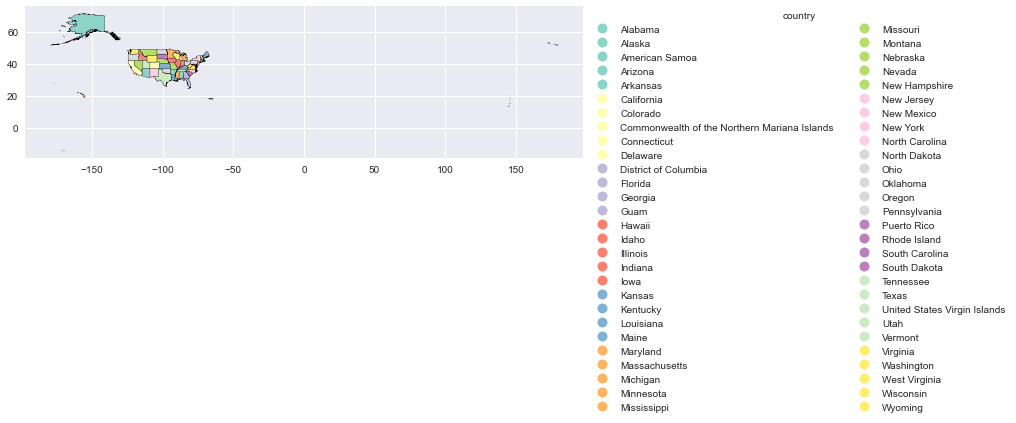

In [65]:
leg_kwds = {'title': 'country', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

country.plot(column = 'NAME', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set3')
plt.show()

<Figure size 1008x576 with 0 Axes>

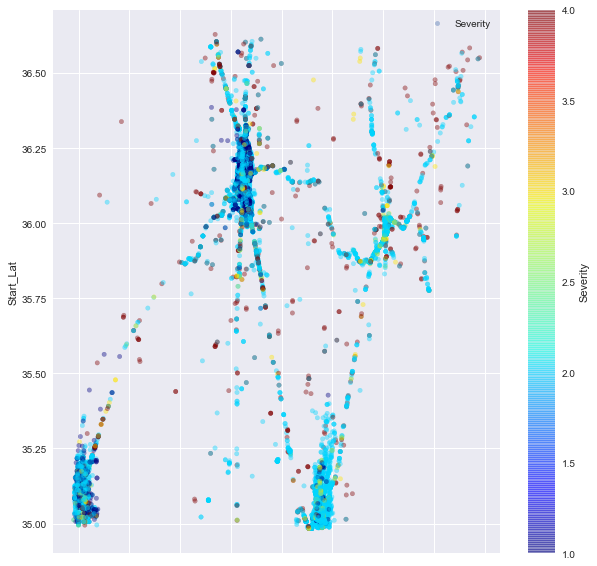

In [66]:
plt.figure(figsize=(14,8))
sub_6=Tn_accident[Tn_accident.Severity<5]
viz_4=sub_6.plot(kind='scatter', x='Start_Lng',y='Start_Lat',label='Severity',c='Severity',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4,figsize=(10,10))
viz_4.legend()
plt.ioff()

In [67]:
traffic_accident.head()

,city,rpa,Zipcode,state,weather_description,harmfuldescriptions,number_of_injuries,collision_type,date_and_time,harmfulcodes,...,illuaccidemination,accident_number,collision_type_description,illumination_description,street_address,number_of_fatalities,weather,property_damage,lat,geometry
0,MADISON,17040,37115,TN,CLEAR,MOTOR VEHICLE IN TRANSPORT,0.0000,5,2014-07-06T12:45:00,12,...,1,20400639785,SIDESWIPE - SAME DIRECTION,DAYLIGHT,MM 93 0 I65 N,0.0000,21,None,0.0000,POINT (0.00000 0.00000)
1,NASHVILLE,82042,37210,TN,None,MOTOR VEHICLE IN TRANSPORT,0,4,2021-12-08T22:00:00,12,...,3,20210625398,ANGLE,DARK - LIGHTED,MM 211 7 I 40,0,None,None,36.1499,POINT (-86.74830 36.14990)
2,NASHVILLE,6115,37215,TN,CLEAR,MOTOR VEHICLE IN TRANSPORT,0,11,2021-12-08T17:11:00,12,...,1,20210625322,Front to Rear,DAYLIGHT,HARDING PL & HILLSBORO PKE,0,21,None,36.0914,POINT (-86.82870 36.09140)
3,NASHVILLE,1007,37213,TN,CLEAR,MOTOR VEHICLE IN TRANSPORT,0,5,2021-12-08T18:12:00,12,...,3,20210625225,SIDESWIPE - SAME DIRECTION,DARK - LIGHTED,I24 E ENT RAMP & I 24,0,21,None,36.1662,POINT (-86.76590 36.16620)
4,NASHVILLE,82061,37210,TN,CLEAR,MOTOR VEHICLE IN TRANSPORT,0,11,2021-12-08T18:17:00,12,...,2,20210625203,Front to Rear,DARK - NOT LIGHTED,I24E & I24 W ENT RAMP,0,21,None,36.1386,POINT (-86.72730 36.13860)


In [68]:

map("Tn", fill =True, col = "white", bg = "lightblue")
points(lng,lat, pch = 20, cex  = 0.01, col = "red")

TypeError: map() takes no keyword arguments

In [ ]:
#ax = T.plot(figsize = (8, 10), color = 'lightgreen')
#Tn_accident_zip.plot(ax = ax, column = 'City');
#plt.show();

In [ ]:
center = 36.174465, -86.767960
print(center)

In [ ]:
#create our map of Nashville Zip Code 37207 and show it
map = folium.Map(location = center, zoom_start = 12,tiles='CartoDB dark_matter')
map

In [ ]:
cluster_map = folium.Map(location = center, zoom_start = 4.4,tiles='CartoDB dark_matter')

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map)

folium.GeoJson(country).add_to(cluster_map)

# inside the loop add each marker to the cluster
for row_index, row_values in .iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['ID'])
    icon=folium.Icon(color='gray',icon='car', prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)
    
    
#save an interactive HTML map by calling .save()
#Tn_accident_zip.save('../maps/cluster37207.html')

cluster_map

In [ ]:
Tn_accident1

In [ ]:
fig, ax = plt.subplots(figsize=(15.7,10.27))
sns.scatterplot(x = 'Start_Time',y = 'End_Time',data =, hue = 'Severity',palette=['green','blue','dodgerblue','red']).set_title('Accidents throughout the City');

In [ ]:
type(Tn_accident_zip)

In [ ]:
group_city = Tn_accident_zip.groupby(["City"]).agg(Count = ('ID','count'))
group_city.reset_index(level=0, inplace=True)
group_city=group_city.sort_values(by='Count', ascending=False).head(15)
group_city


In [ ]:
city_merge=group_city.merge(Tn_accident_zip, on='City',how='outer')
         
city_merge

In [ ]:
tennessee.crs

In [ ]:
city_merge_geo=gpd.GeoDataFrame(city_merge, 
                           crs = zipcodes.crs, 
                           geometry =Tn_accident_zip['geometry'])

In [ ]:
city_merge_geo.head()

In [ ]:
city_geo=city_merge_geo[['City','Count','geometry']]
type(city_geo)

In [ ]:
#slice only three columns
group=city_merge[['City','Count','Year']].sort_values('Count',ascending=False)
group=group.groupby('City').sum()

In [ ]:
#pd.to_datetime('Year')
group

In [ ]:
#group by city and apply it on count
group_city=group['Count'].groupby(group['City'])
group_city

In [ ]:
#to see the length
len(list(group['Count'].groupby(group['City'])))

In [ ]:
#to see the list of group
list(group['Count'].groupby(group['City']))

In [ ]:
zipcodes.crs

In [ ]:
#city_map= gpd.GeoDataFrame(group_city, 
                          # crs =zipcodes.crs, 
                          # geometry =Tn_accident_zip['geometry'])

In [ ]:
# Merge shape file with accident data
city_map =group_city.merge(tennessee, left_on = 'City', right_on = 'City')
city_map.head(2)

In [ ]:
city_map1= gpd.GeoDataFrame(city_map, 
                                crs =zipcodes.crs, 
                                geometry =city_map['geometry'])

In [ ]:
city_map2=city_map1[['City','Count','geometry']]
city_map2

In [ ]:
tennessee.plot()

In [ ]:
tennessee